<font color='darkblue' size='6'> Fetal Health Classification  </font>
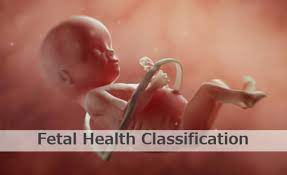
### Submitted to: <font color='darkred' size='4'> Dr. Doaa Mahmoud </font>
### Facilitator: <font color='darkred' size='4'> Eng. Marwan Hatem </font>
### Presented by:  <font color='darkred' size='4'> Mohamed Anwar </font>

#### <font color='green' size='4'>Introduction :</font>

In the realm of healthcare, the accurate classification of fetal health is pivotal for ensuring the well-being of unborn children. The ability to predict and identify potential issues during pregnancy can significantly impact medical decisions and patient outcomes. This project is dedicated to the task of fetal health classification, focusing on the evaluation and selection of various machine learning models.

Fetal health classification entails the assessment of multiple parameters derived from monitoring devices and medical tests. The project utilizes a diverse dataset that encompasses a wide range of features, including cardiotocogram (CTG) readings, accelerations, and uterine contractions. The objective is to build robust classification models capable of accurately predicting fetal health status.

The project begins with data exploration and preprocessing, addressing issues such as class imbalance and feature scaling. It then delves into the creation and evaluation of different machine learning models, both linear and non-linear, to determine their effectiveness in fetal health classification.

Linear classifiers, such as Logistic Regression and Support Vector Machines (SVMs), are employed initially to establish a baseline for model performance. Non-linear classifiers, including Random Forest, Decision Trees, and XGBoost, are subsequently explored to potentially improve classification accuracy.

Grid search techniques are utilized to fine-tune hyperparameters and optimize the models. The project emphasizes the importance of evaluating model performance using metrics such as accuracy, confusion matrices, and classification reports.

The notebook also explores ensemble methods like AdaBoost and Voting, combining the strength of multiple classifiers to further enhance classification accuracy.

Throughout the journey, the project showcases the steps involved in building, optimizing, and evaluating machine learning models for fetal health classification. The focus is not only on achieving high accuracy but also on providing insights and recommendations to healthcare practitioners.

Join us as we navigate the fascinating world of fetal health classification and model selection. Together, we will explore how machine learning can contribute to improving prenatal care and ensuring the health of future generations.


In [2]:
import os

os.chdir('C:\\Users\\Anwar\\Desktop') 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [3]:
x=pd.read_csv('fetal_health.csv')
x


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


<AxesSubplot:xlabel='fetal_health', ylabel='count'>

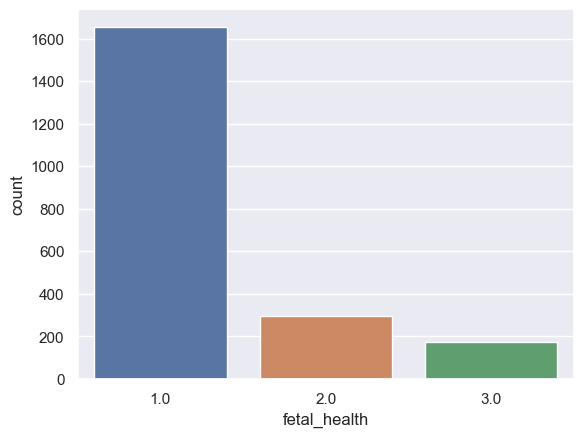

In [3]:
sns.set()
sns.countplot(data=x , x='fetal_health')

# Imbalanced data

In [4]:
x.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

# No null values 

In [5]:
x.duplicated().sum()


13

In [6]:
x.drop_duplicates(inplace = True)


In [7]:
x.shape

(2113, 22)

In [8]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2113 non-null   float64
 1   accelerations                                           2113 non-null   float64
 2   fetal_movement                                          2113 non-null   float64
 3   uterine_contractions                                    2113 non-null   float64
 4   light_decelerations                                     2113 non-null   float64
 5   severe_decelerations                                    2113 non-null   float64
 6   prolongued_decelerations                                2113 non-null   float64
 7   abnormal_short_term_variability                         2113 non-null   float64
 8   mean_value_of_short_term_variability  

## all data is numerical

In [9]:
x.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,...,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000
mean,133.304780,0.003188,0.009517,0.004387,0.001901,0.000003,0.000159,46.993848,1.335021,9.795078,...,93.564600,164.099858,4.077142,0.325603,137.454330,134.599621,138.089446,18.907241,0.318504,1.303833
std,9.837451,0.003871,0.046804,0.002941,0.002966,0.000057,0.000592,17.177782,0.884368,18.337073,...,29.562269,17.945175,2.951664,0.707771,16.402026,15.610422,14.478957,29.038766,0.611075,0.614279
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.005000,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,...,93.000000,162.000000,4.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.000000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.000000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [10]:
x['fetal_health'].value_counts()

1.0    1646
2.0     292
3.0     175
Name: fetal_health, dtype: int64

# Oversampling our dataset

In [11]:
from sklearn.utils import resample
df_majority = x[x['fetal_health'] == 1.0]
df_minority1 = x[x['fetal_health'] == 2.0]
df_minority2 = x[x['fetal_health'] == 3.0]

# Upsample minority classes
df_minority1_upsampled = resample(df_minority1,
                                  replace=True,
                                  n_samples=1646,
                                  random_state=42)

df_minority2_upsampled = resample(df_minority2,
                                  replace=True,
                                  n_samples=1646,
                                  random_state=42)

df_upsampled = pd.concat([df_minority1_upsampled, df_minority2_upsampled, df_majority])

df_upsampled = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)


<AxesSubplot:xlabel='fetal_health', ylabel='count'>

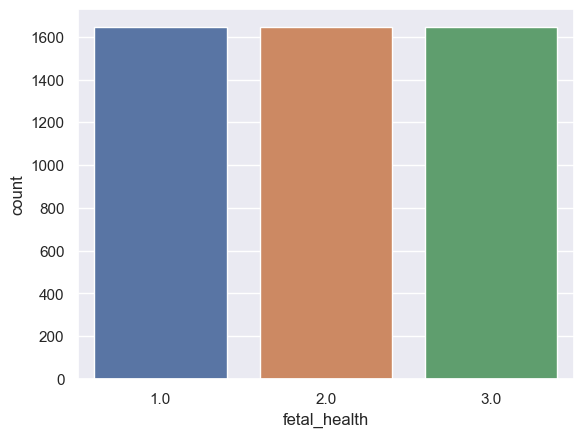

In [12]:
sns.set()
sns.countplot(data= df_upsampled, x='fetal_health')

In [13]:

categorical_columns = x.columns
for column in categorical_columns:
    x[column] = le.fit_transform(x[column])


# Split

In [121]:
X = x.drop('fetal_health', axis=1).values  # Features
Y = x['fetal_health'].values  # Target variable


In [15]:
X

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,9,0,0,0,0,0,0,61,3,43,...,60,12,3,2,0,34,62,36,71,2
1,21,6,0,6,3,0,0,5,19,0,...,126,18,75,6,1,55,61,55,12,1
2,22,3,0,8,3,0,0,4,19,0,...,126,18,75,5,1,55,60,53,13,1
3,23,3,0,8,3,0,0,4,22,0,...,113,3,47,11,0,51,59,52,13,2
4,21,7,0,8,0,0,0,4,22,0,...,113,3,47,9,0,51,61,53,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,29,0,0,7,0,0,0,67,0,25,...,36,87,54,4,0,67,75,67,2,1
2122,29,1,0,7,0,0,0,66,2,22,...,62,53,46,6,0,66,73,66,3,2
2123,29,1,0,7,0,0,0,67,2,20,...,63,53,47,5,0,67,73,67,4,2
2124,29,1,0,6,0,0,0,66,2,27,...,62,53,46,6,0,66,72,66,4,2


In [16]:
Y

0       1
1       0
2       0
3       0
4       0
       ..
2121    1
2122    1
2123    1
2124    1
2125    0
Name: fetal_health, Length: 2113, dtype: int64

In [17]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()


In [18]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [20]:
X_train_Scaled=scaler.fit_transform(X_train)

In [21]:
X_test_Scaled=scaler.fit_transform(X_test)

In [22]:
X_train.shape

(1584, 21)

# Linear Classifiers 

# Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [78]:
lr = LogisticRegression()  
lr.fit(X_train,y_train)

LogisticRegression()

In [79]:
print (lr.score(X_train,y_train))
print (lr.score(X_test,y_test))

0.8914141414141414
0.9130434782608695


In [105]:
lr2=LogisticRegression(C=.111,penalty='l1',solver='liblinear')

In [106]:
lr2.fit(X_train,y_train)

LogisticRegression(C=0.111, penalty='l1', solver='liblinear')

In [107]:
print (lr2.score(X_train,y_train))
print (lr2.score(X_test,y_test))

0.8920454545454546
0.9187145557655955


## Still underfitting 

In [126]:
from sklearn.svm import SVC

In [127]:
SVC1= SVC(C=0.1, kernel='rbf')

In [128]:
SVC1.fit(X_train,y_train)

SVC(C=0.1)

In [129]:
SVC1.score(X_train,y_train)

0.797979797979798

In [130]:
SVC1.score(X_test,y_test)

0.8204158790170132

## Underfitting 

In [131]:
SVC2= SVC(C=1, kernel='rbf')

In [132]:
SVC2.fit(X_train,y_train)

SVC(C=1)

In [133]:
SVC2.score(X_train,y_train)

0.88510101010101

In [134]:
SVC2.score(X_test,y_test)

0.9035916824196597

##  Underfitting 

# Non-Linear Classifiers 

# Random Forest 

In [154]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=6 , max_features=22)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, max_features=22)

In [155]:
rf.score(X_train,y_train)

0.9652777777777778

In [156]:
rf.score(X_test,y_test)

0.9527410207939508

## Displaying Feature Importance for RF model 

<AxesSubplot:>

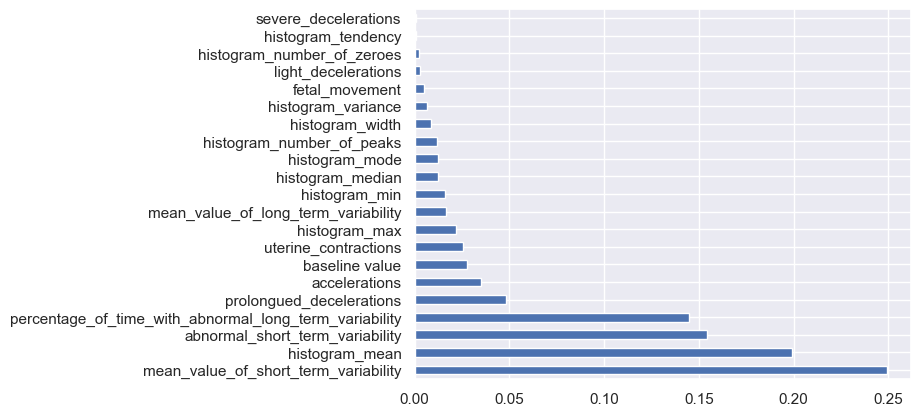

In [160]:
feat_importances = pd.Series(rf.feature_importances_, index=x.columns[:-1])
feat_importances.nlargest(22).plot(kind='barh')

In [174]:
# Grid Search for Random Forest

In [161]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}


In [162]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)


In [163]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=6, max_features=22),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [164]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [167]:
best_params

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [173]:
best_rf = grid_search.best_estimator_
best_rf

RandomForestClassifier(bootstrap=False, n_estimators=300)

In [166]:
best_rf.score(X_train, y_train)


0.9993686868686869

# Making a model using Grid Parameters 

In [168]:
param_grid = {
    'bootstrap': False,
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 300
}
rf_classifier = RandomForestClassifier(**param_grid)


In [170]:
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)


In [171]:
rf_classifier.score(X_test,y_test)

0.9621928166351607

In [172]:
rf_classifier.score(X_train,y_train)

0.9993686868686869

In [23]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree

In [181]:
dt = DecisionTreeClassifier(max_depth =6, max_features= 22)

In [182]:
dt.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=6, max_features=22)

In [183]:
print (dt.score(X_train , y_train))
print (dt.score(X_test , y_test))

0.9577020202020202
0.9489603024574669


In [185]:
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_dt = grid_search.best_estimator_




In [186]:
best_params

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

# Decision tree with grid parameters

In [187]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {
    'criterion': 'gini',
    'max_depth': 7,
    'min_samples_leaf': 1,
    'min_samples_split': 2
}
dt_classifier = DecisionTreeClassifier(**param_grid)


In [188]:
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)


In [189]:
print (dt_classifier.score(X_train , y_train))
print (dt_classifier.score(X_test , y_test))

0.9703282828282829
0.9357277882797732


# Feature importance for dt_classifier Model

<AxesSubplot:>

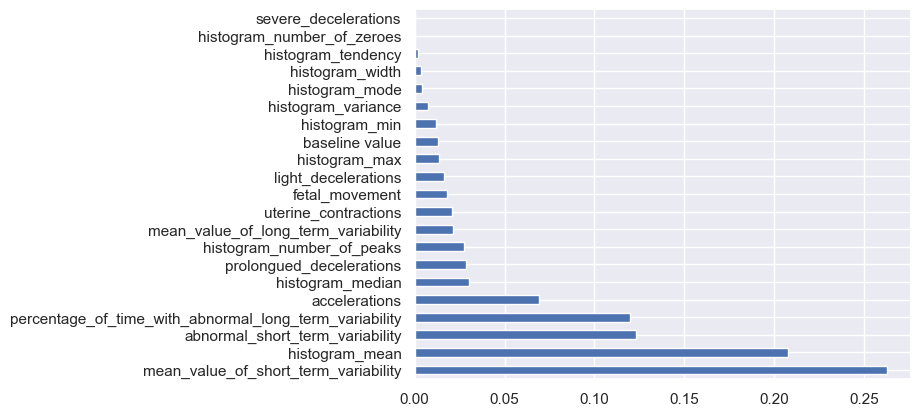

In [193]:
feat_importances = pd.Series(dt_classifier.feature_importances_, index=x.columns[:-1])
feat_importances.nlargest(22).plot(kind='barh')

# XGBoost Classifier

In [35]:
from xgboost import XGBClassifier 

In [230]:
xgb= XGBClassifier(n_estimators=100,max_depth=3,learning_rate=.1)

In [231]:
xgb.fit(X_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [232]:
print (xgb.score(X_train , y_train))
print (xgb.score(X_test , y_test))

0.9835858585858586
0.9640831758034026


In [194]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}


In [195]:
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)


In [196]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=20, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softprob', predictor=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [197]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_


In [198]:
best_xgb = grid_search.best_estimator_


In [199]:
best_xgb.score(X_train, y_train)


0.9993686868686869

In [200]:
best_params

{'colsample_bytree': 0.8,
 'learning_rate': 0.2,
 'max_depth': 4,
 'n_estimators': 100,
 'subsample': 1.0}

In [201]:
from xgboost import XGBClassifier

# Define the best hyperparameters
best_params = {
    'n_estimators': 200,
    'max_depth': 5,
    'learning_rate': 0.1,
    'subsample': 0.9,
    'colsample_bytree': 0.9
}

# Create an XGBoost classifier with the best hyperparameters
best_xgb = XGBClassifier(**best_params)


In [202]:
best_xgb.fit(X_train, y_train)

y_pred_xgb = best_xgb.predict(X_test)


In [203]:
print (best_xgb.score(X_train , y_train))
print (best_xgb.score(X_test , y_test))

0.9993686868686869
0.9678638941398866


# Evaluating XGB models 

In [39]:
from sklearn.metrics import confusion_matrix , classification_report

In [40]:
predictions = xgb.predict(X_test)
predictions

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2,

In [41]:
con = confusion_matrix(y_test,predictions)
con

array([[414,   5,   1],
       [ 14,  59,   0],
       [  0,   0,  36]], dtype=int64)

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

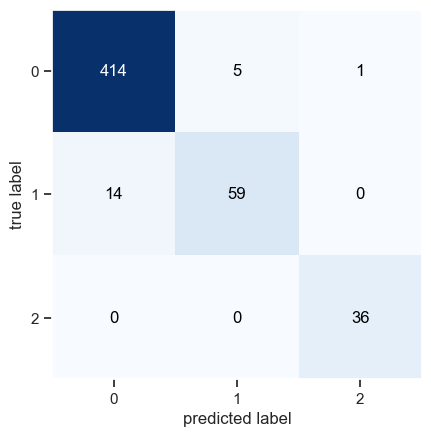

In [43]:
from mlxtend.plotting import plot_confusion_matrix 
plot_confusion_matrix(con)

In [44]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       420
           1       0.92      0.81      0.86        73
           2       0.97      1.00      0.99        36

    accuracy                           0.96       529
   macro avg       0.95      0.93      0.94       529
weighted avg       0.96      0.96      0.96       529



(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

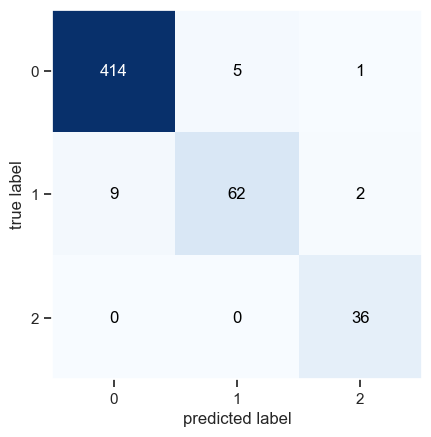

In [233]:
con = confusion_matrix(y_test,y_pred_xgb)
plot_confusion_matrix(con)


In [234]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       420
           1       0.93      0.85      0.89        73
           2       0.92      1.00      0.96        36

    accuracy                           0.97       529
   macro avg       0.94      0.95      0.94       529
weighted avg       0.97      0.97      0.97       529



# Adaboost 

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

base_estimator = RandomForestClassifier(n_estimators=50)  
ada = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=5, learning_rate=0.1)


In [46]:
ada.fit(X_train , y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=50),
                   learning_rate=0.1, n_estimators=5)

In [47]:
print (ada.score(X_train , y_train))
print (ada.score(X_test , y_test))

0.9993686868686869
0.9621928166351607


In [48]:
con1 = confusion_matrix(y_test,ada.predict(X_test))
con1

array([[414,   5,   1],
       [ 12,  59,   2],
       [  0,   0,  36]], dtype=int64)

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

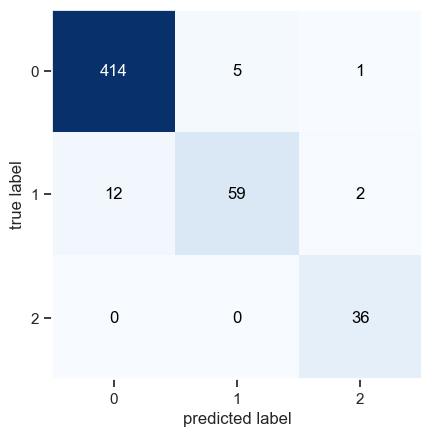

In [49]:
plot_confusion_matrix(con1)

In [50]:
print(classification_report(y_test,ada.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       420
           1       0.92      0.81      0.86        73
           2       0.92      1.00      0.96        36

    accuracy                           0.96       529
   macro avg       0.94      0.93      0.93       529
weighted avg       0.96      0.96      0.96       529



# Voting

In [51]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import VotingClassifier

In [52]:
clf1= LogisticRegression()
clf2= AdaBoostClassifier(base_estimator=base_estimator, n_estimators=5, learning_rate=0.1)
clf3= XGBClassifier(n_estimators=5,max_depth=4,learning_rate=.1)

In [53]:
v_clf=VotingClassifier(estimators=[("LOG",clf1),("Ada",clf2),('xgb',clf3)],voting='hard')

In [54]:
v_clf.fit(X_train , y_train)

VotingClassifier(estimators=[('LOG', LogisticRegression()),
                             ('Ada',
                              AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=50),
                                                 learning_rate=0.1,
                                                 n_estimators=5)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorica...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=4,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=5, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))])

In [55]:
print (v_clf.score(X_train , y_train))
print (v_clf.score(X_test , y_test))

0.9696969696969697
0.9489603024574669


In [56]:
v_clf=VotingClassifier(estimators=[("LOG",clf1),("Ada",clf2),('xgb',clf3)],voting='soft')

In [57]:
v_clf.fit(X_train , y_train)

VotingClassifier(estimators=[('LOG', LogisticRegression()),
                             ('Ada',
                              AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=50),
                                                 learning_rate=0.1,
                                                 n_estimators=5)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorica...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=4,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=5, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))],
                 voting='soft')

In [58]:
print (v_clf.score(X_train , y_train))
print (v_clf.score(X_test , y_test))

0.9797979797979798
0.9565217391304348


In [59]:
print(classification_report(y_test,v_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       420
           1       0.93      0.77      0.84        73
           2       0.95      0.97      0.96        36

    accuracy                           0.96       529
   macro avg       0.95      0.91      0.93       529
weighted avg       0.96      0.96      0.95       529



#  Cross Validation for xgb_best 

In [60]:
from sklearn.model_selection import KFold , cross_val_score

In [61]:
K_fold= KFold(n_splits=10 , shuffle=True , random_state=42)

In [239]:
scoring='accuracy'
score=cross_val_score(best_xgb,X,Y,cv=K_fold,scoring=scoring)
print(score)

[0.96226415 0.96698113 0.95754717 0.95734597 0.95260664 0.92890995
 0.99052133 0.95734597 0.95734597 0.93838863]


In [240]:
round(np.mean(score)*100,2)

95.69

#### <font color='green' size='4'>Conclusion :</font>

In this comprehensive exploration of fetal health classification and model selection, we embarked on a journey to leverage machine learning for the critical task of assessing and predicting fetal well-being during pregnancy. The findings and insights derived from this project are summarized as follows:

1. **Data Preprocessing**: We initiated our journey by thoroughly examining and preparing the dataset. Addressing issues like class imbalance and feature scaling was essential to ensure the models' performance was not compromised by data-related challenges.

2. **Model Evaluation**: We assessed the effectiveness of various machine learning models, starting with linear classifiers such as Logistic Regression and Support Vector Machines (SVMs). These models provided valuable baselines for our classification task.

3. **Non-Linear Classifiers**: To improve classification accuracy, we explored non-linear models, including Random Forest, Decision Trees, and XGBoost. These models demonstrated their potential to handle complex relationships within the data.

4. **Hyperparameter Tuning**: The utilization of grid search techniques allowed us to fine-tune model hyperparameters, optimizing their performance. This step was crucial in achieving the best possible classification results.

5. **Ensemble Methods**: We experimented with ensemble methods like AdaBoost and Voting, harnessing the collective strength of multiple classifiers. These approaches further boosted our model's predictive capabilities.

6. **Model Selection**: Throughout our analysis, we compared the performance of different models using various evaluation metrics, including accuracy, confusion matrices, and classification reports. This allowed us to identify the most suitable models for fetal health classification.

7. **Impact on Healthcare**: The successful application of machine learning models in fetal health classification holds immense promise for prenatal care. The ability to accurately predict fetal health can lead to timely interventions, improved patient outcomes, and enhanced medical decision-making.

8. **Future Directions**: While our project has achieved notable results, there is always room for improvement. Future work in this field could involve incorporating additional data sources, exploring more advanced machine learning techniques, and collaborating with healthcare professionals to translate model predictions into actionable insights.

In conclusion, our journey into fetal health classification and model selection underscores the potential of machine learning to revolutionize prenatal care. By harnessing the power of data-driven insights, we can make significant strides in ensuring the health and well-being of both mothers and their unborn children. This project serves as a testament to the transformative impact of machine learning in the realm of healthcare, with the potential to save lives and improve the quality of care provided to expectant mothers.
